# Logistic Regression

In [34]:
import pandas as pd
import numpy as np
import random 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_fscore_support

random.seed(42) #in case we will use random somewhere

data = pd.read_csv("../project/data/processed/processed_credit_risk_dataset.csv")

In [24]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
                        'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
                        'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 
                        'cb_person_default_on_file_Y']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['loan_intent_DEBTCONSOLIDATION',
                                                   'loan_intent_EDUCATION',
                                                   'loan_intent_HOMEIMPROVEMENT',
                                                   'loan_int...
                                                   'loan_intent_PERSONAL',
                                                   'loan_intent_VENTURE',
                                                   'loan_grade_A',
                                                   'loan_grade_B',
                                                   'loan_grade_C',
                                                   'loan_grade_D',
                                                   'loan_grade_E',
                                                   'loan_grade_F',
                                                   'loan_grade_G',
                                                   'person_home_ownership_MORTGAGE',
                                                   'person_home_ownership_OTHER',
                                                   'person_home_ownership_OWN',
                                                   'person_home_ownership_RENT',
                                                   'cb_person_default_on_file_Y'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [28]:
y_pred = model_pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[4840  232]
 [ 701  744]]
Precision: 76.23%
Recall: 51.49%
F1 Score: 61.46%


In [29]:
new_data = pd.DataFrame({
    'person_age': [3.1780538303479458],
    'person_income': [11.461642696843066],
    'person_emp_length': [2.0],
    'loan_amnt': [35000.0],
    'loan_int_rate': [7.9],
    'loan_percent_income': [0.31481073984003355],
    'cb_person_cred_hist_length': [1.0986122886681098],
    'loan_intent_DEBTCONSOLIDATION': [0],
    'loan_intent_EDUCATION': [0],
    'loan_intent_HOMEIMPROVEMENT': [0],
    'loan_intent_MEDICAL': [0],
    'loan_intent_PERSONAL': [0],
    'loan_intent_VENTURE': [1],
    'loan_grade_A': [1],
    'loan_grade_B': [0],
    'loan_grade_C': [0],
    'loan_grade_D': [0],
    'loan_grade_E': [0],
    'loan_grade_F': [0],
    'loan_grade_G': [0],
    'person_home_ownership_MORTGAGE': [0],
    'person_home_ownership_OTHER': [0],
    'person_home_ownership_OWN': [0],
    'person_home_ownership_RENT': [1],
    'cb_person_default_on_file_Y': [0]
})

# Predict new data
new_pred = model_pipeline.predict(new_data)
print("Prediction for new data:", new_pred)

Prediction for new data: [0]


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score


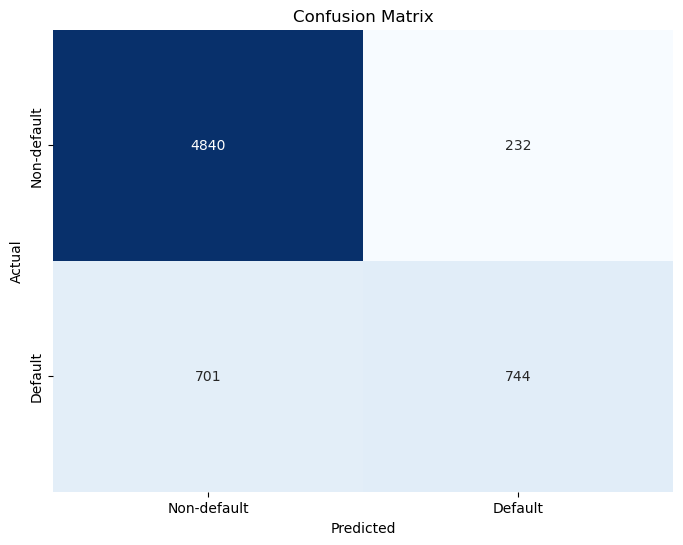

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
